## In this short tutorial we will see how to work will sparse matrices and apply (most) model on a dummy data

* check out this link https://dziganto.github.io/Sparse-Matrices-For-Efficient-Machine-Learning/

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import seaborn as sns
np.random.seed(seed=12)

dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  ## dummy data (more like bernoulli??)
y = np.random.binomial(1, 0.5, 2000)  ## dummy target variable

Text(0.5,1.05,'Sparse Matrix')

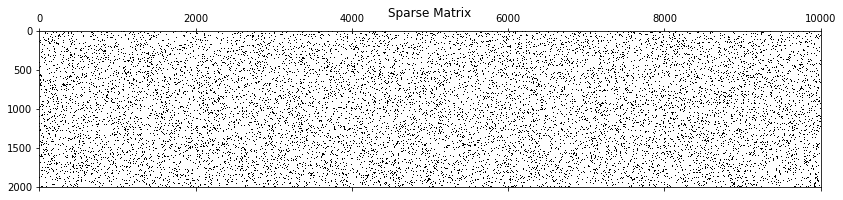

In [21]:
plt.figure(figsize=(14,12))
plt.spy(dataset)
plt.title("Sparse Matrix")


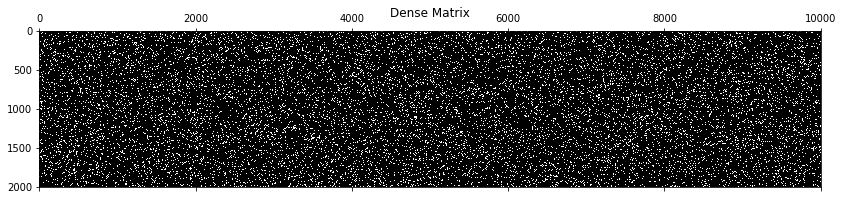

In [20]:
np.random.seed(seed=43)
plt.figure(figsize=(14,12))
plt.spy(np.random.binomial(1, 0.9, 20000000).reshape(2000,10000))
plt.title("Dense Matrix");

# Lets convert the sparse matrix using CSR 

In [27]:
compressed_dataset = csr_matrix(dataset)

Text(0.5,1,'Compression')

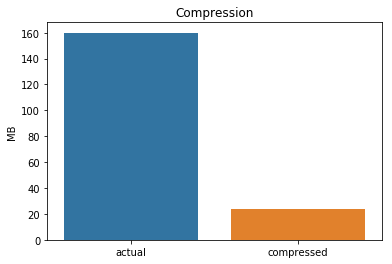

In [29]:
# How memory is saved by compressing
actual_size = np.array(dataset).nbytes/1e6
compressed_size = (compressed_dataset.data.nbytes +compressed_dataset.indptr.nbytes + compressed_dataset.indices.nbytes)/1e6

sns.barplot(['actual', 'compressed'], [actual_size, compressed_size])
plt.ylabel('MB')
plt.title('Compression')

In [31]:
# How computation is saved
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=99)
%timeit lr.fit(dataset, y)
%timeit lr.fit(compressed_dataset, y)

sns.barplot(['actual', 'compressed'], [%timeit lr.fit(dataset, y), %timeit lr.fit(compressed_dataset, y)])

SyntaxError: invalid syntax (<ipython-input-31-be5f2fd87fef>, line 7)